In [2]:
import numpy as np
import numpy.linalg as la

# Q1

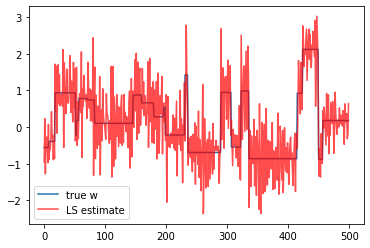

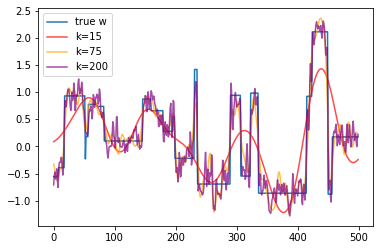

In [184]:
import matplotlib.pyplot as plt
# Load data
data = np.load("blurring.npz")
X = data['X']
y = data['y']

U, S, Vt = la.svd(X, full_matrices=False)

# Estimate w using X and y with regular least squares
# Your code here

S_mat = np.diag(S)

w_LS = Vt.T@la.inv(S_mat.T@S_mat)@S_mat.T@U.T@y

# Estimate w using X and y with truncated SVD
# Your code here

def get_trunc_svd(k):
    U_k = U[:,0:k]
    S_k = np.diag(S[0:k])
    Vt_k = Vt[0:k,:]

    return Vt_k.T@la.inv(S_k.T@S_k)@S_k.T@U_k.T@y

w_15 =get_trunc_svd(15)
w_75 = get_trunc_svd(75)
w_200 =get_trunc_svd(200)

# Compare estimate to true value for LS

plt.plot(data['w'],label='true w')
plt.plot(w_LS, alpha=0.7,c='red',label='LS estimate')
plt.legend()
plt.show()

plt.plot(data['w'],label='true w')
plt.plot(w_15, alpha=0.7,c='red',label='k=15')
plt.plot(w_75, alpha=0.7,c='orange',label='k=75')
plt.plot(w_200, alpha=0.7,c='purple',label='k=200')
plt.legend()
plt.show()

# Q2

In [31]:
A = np.array([[0, 0, 0, 1],
             [1, 0, 0, 0],
             [0, 0.5, 0, 0],
             [0, 0.5, 1, 0]])

def get_PageRank(A, guess, epsilon = 0.01):
    last_pi = guess / la.norm(guess)
    while True:
        next_pi = A@last_pi
        next_pi = next_pi / la.norm(next_pi)
        if (la.norm(next_pi - last_pi)) > epsilon:
            return next_pi
        last_pi = next_pi


pi = get_PageRank(A, np.array([1, 1, 1, 1]), 0.0001)
print(f"PageRank for 4 pages in Q2b is {pi}")

def get_GooglePageRank(A, a):
    n,_ = A.shape
    u = np.ones(n)
    G = a*A + (1-a)*(1/n)*(u@u.T)
    G = G/G.sum(axis=0)

    return get_PageRank(G, u)

G_pi = 


PageRank for 4 pages in Q2b is [0.47140452 0.47140452 0.23570226 0.70710678]


In [34]:
get_GooglePageRank(A, 0.8)

array([0.49236596, 0.49236596, 0.36927447, 0.61545745])

# Q3

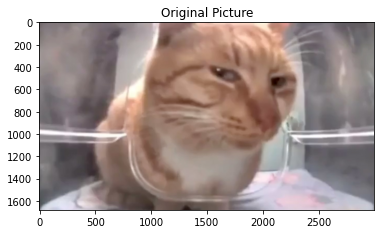

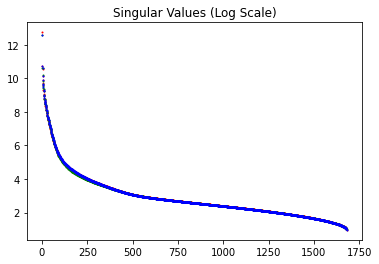

In [157]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

# feel free to use your favorite picture
# or work with the provided one
img = Image.open("mrfresh.jpg", mode="r")
img = np.array(img).astype(np.int32)

plt.imshow(img)
plt.title('Original Picture')
plt.show()

# YOUR CODE BELOW
# note that images usually have 3 channels
# so, you can reshape it
# img_stack = face.reshape((img.shape[0], -1)) 
# and find its SVD.
# another option is to find the SVD of every color channel

red = img[:,:,0]
green = img[:,:,1]
blue = img[:,:,2]

U_red, S_red, Vt_red = la.svd(red,full_matrices=False)
num_svs = S_red.shape

U_green, S_green, Vt_green = la.svd(green,full_matrices=False)

U_blue, S_blue, Vt_blue = la.svd(blue,full_matrices=False)

plt.scatter(x=(np.arange(num_svs[0])+1), y=np.log(S_red), c="r", s=1)
plt.scatter(x=(np.arange(num_svs[0])+1), y=np.log(S_green), c="g", s=1)
plt.scatter(x=(np.arange(num_svs[0])+1), y=np.log(S_blue), c="b", s=1)
plt.title('Singular Values (Log Scale)')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


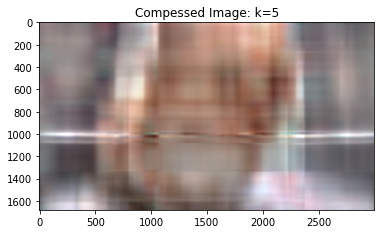

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


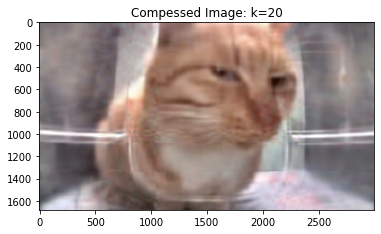

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


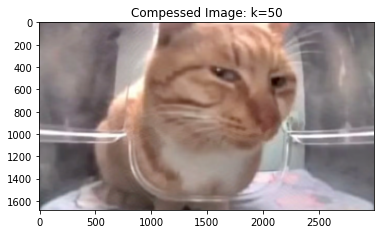

In [168]:
def compress(image, k):
    """
    Perform svd decomposition and truncate it (using k singular values/vectors)
    
    Parameters: 
        image (np.array): input image (probably, colourful)
        k (int): approximation rank (number of singular values)

    Returns:
      reconst_matrix (np.array): reconstructed matrix (tensor in colourful case)
      
      s (np.array): array of singular values 
    """

    shp = image.shape
    colors = image.shape[2]
    s = np.zeros((k, colors))

    reconst_matrix = np.zeros((shp[0], shp[1], shp[2]))

    for c in range(0, colors):
        U, S, Vt = la.svd(image[:,:,c], full_matrices=True)
        s[:,c] = S[0:k]
        reconst_matrix[:,:,c] = U[:,0:k]@np.diag(S[0:k])@Vt[0:k,:]

    return reconst_matrix.astype(np.int32), s 

X_5, five_svs = compress(img, 5)
plt.title('Compessed Image: k=5')
plt.imshow(X_5.astype(np.int32))
plt.show()

X_20, twenty_svs = compress(img, 20)
plt.title('Compessed Image: k=20')
plt.imshow(X_20.astype(np.int32))
plt.show()

X_50, fifty_svs = compress(img, 50)
plt.title('Compessed Image: k=50')
plt.imshow(X_50.astype(np.int32))
plt.show()


(375, 500, 1)


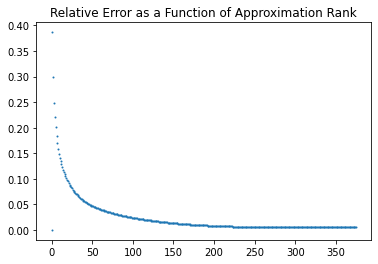

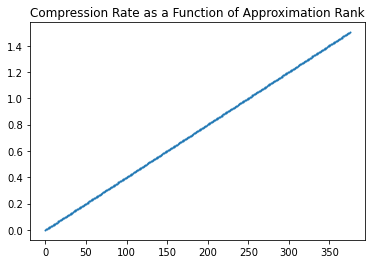

In [179]:
#Using smaller image because using a 1600x3000 cat picture wasn't worth the runtime
img = Image.open("disaster-girl.jpg", mode="r")
img = np.array(img).astype(np.int32)
img_red = img[:,:,0].reshape((img.shape[0], img.shape[1], 1))

k_max = min(img_red.shape[0], img_red.shape[1])

rel_error = np.zeros(k_max+1)
print(img_red.shape)

orig_norm = la.norm(img_red)

for k in range(1, k_max+1):
    X_recon_k,_ = compress(img_red, k)
    #print(la.norm(img_red - X_recon_k))
    rel_error[k] = la.norm(img_red - X_recon_k) / orig_norm

plt.scatter(x=np.arange(k_max+1), y=rel_error, s=1)
plt.title('Relative Error as a Function of Approximation Rank')
plt.show()

# Note: Am doing single-color case here
n, p, _ = img_red.shape
recon_size = np.zeros(k_max+1)
for k in range(1, k_max+1):
    recon_size[k] = n*k + k + k*n # = U size + k SVs + V size

recon_size = recon_size / img_red.size

plt.scatter(x=np.arange(k_max+1), y=recon_size, s=1)
plt.title('Compression Rate as a Function of Approximation Rank')
plt.show()